<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Что предстоит сделать?

- Подготовить данные:

    - Проверить эффективность обогащения и вычислить её на обучающей выборке для признака rougher.output.recovery. Найти MAE между расчётами и значением признака.

    - Проанализировать признаки, недоступные в тестовой выборке.

    - Провести предобработку данных.

- Проанализировать данные

    - Проанализировать как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

    - Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.

    - Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Описать выводы и удалить аномалии.

- Построить модель:

    - Написать функцию для вычисления итоговой sMAPE.

    - Обучить разные модели и оценить их качество. Выбрать лучшую модель и проверить её на тестовой выборке.

- Общий вывод

## Подготовка данных

In [1]:
# Блок импорта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Подготовка моделей
from numpy.random import RandomState
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


# метрики
from sklearn.metrics import mean_absolute_error

# модели
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso





Посмотрим на наши данные

In [2]:
train_df = pd.read_csv('/datasets/gold_industry_train.csv')
test_df = pd.read_csv('/datasets/gold_industry_test.csv')
full_df = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

Видим что во всех таблицах есть пропуски

In [6]:
print('Колличество пропусков в тестовой выборке:', test_df.isnull().sum().sum())
print('Колличество пропусков в обучающей выборке:', train_df.isnull().sum().sum())
print('Колличество пропусков в полной выборке:', full_df.isnull().sum().sum())

Колличество пропусков в тестовой выборке: 375
Колличество пропусков в обучающей выборке: 3050
Колличество пропусков в полной выборке: 4481


In [7]:
full_df.shape

(19439, 87)

In [8]:
train_df.shape

(14579, 87)

In [9]:
test_df.shape

(4860, 53)

С данными познакомились. Обратим внимание, что в данных очень много пропущенных значений. Позже решим, что с ними делать. Перейдём к следующему этапу.

# Расчёт эффективности обогащения

Проверим правильно ли рассчитана эффективность обогащения в нашей обучающей выборке, которая лежит в столбце rougher.output.recovery. Для этого вручную расчитаем нашу эффективность по формуле:

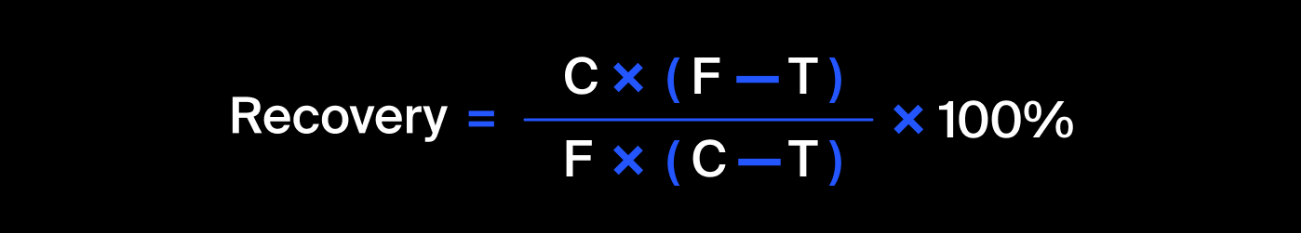

Где:

- C — доля золота в концентрате после флотации/очистки
- F — доля золота в сырье/концентрате до флотации/очистки
- T — доля золота в отвальных хвостах после флотации/очистки

И найдём cреднюю абсолютную ошибку между нашими расчётами и значением признака в столбце. Так мы узнаем верно ли рассчитана эффективность обогащения в нашем признаке. Приступим.

In [10]:
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

In [11]:
recovery = C * (F - T) / (F * (C - T)) * 100

Отлично. Теперь расчитаем среднюю абсолютную ошибку, т.к. в наших данных есть пропуски и при их удалении пропусков получаются разные размеры наших датафреймов, то тут готовая формула из библиотеки sklearn не подойдёт. Напишем нашу формулу вручную.
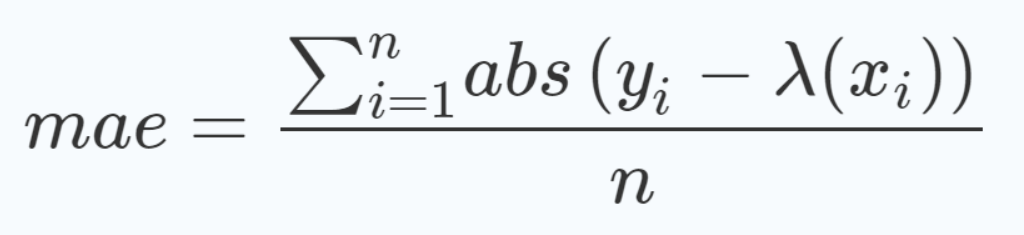

In [12]:
(abs(recovery - train_df['rougher.output.recovery']).sum()) / len(train_df)

9.83758577644259e-15

Как помним, что чем ниже значение, тем лучше. Значит наша эффективность расчитана верно. Переходим к следущему шагу.

In [13]:
# КОД РЕВЬЮЕРА
1/2 + 1/3 - 5/6

-1.1102230246251565e-16

# Анализ признаков, недоступных в тестовой выборке.

Посчитаем сколько у нас недоступных признаков в тестовой выборке.

In [14]:
train_df.shape[1] - test_df.shape[1]

34

Теперь посмотрим на них.

In [15]:
train_df.columns.drop(test_df.columns)

Index(['rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol', 'rougher.output.recovery',
       'rougher.output.tail_au', 'rougher.output.tail_ag',
       'rougher.output.tail_pb', 'rougher.output.tail_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_pb', 'secondary_cleaner.ou

Видим, что в тестовой выборке у нас отсутствуют все этапы на которых были получены параметры продукта из сырья. Условно, конечные значения после каждого этапа обработки. Это говорит нам о том, что мы должны удалить из train все, чего нету в test, иначе мы не построим проверяемую модель. Переходим к следующему этапу.

# Предобработка данных

Для начала удалим строки с пропусками в целевом признаке, а позже и сами не нужные нам столбцы.

In [16]:
train_df.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)

In [17]:
drop_test = train_df.columns.drop(test_df.columns)

In [18]:
train_df.drop(drop_test, axis=1, inplace=True)

И преобразуем дату в индекс

In [19]:
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)
full_df.set_index('date', inplace=True)

Сначала удалим строки с пропущенным целевым прзнаком, а после заполним пропуски c помощью ffill

In [23]:
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)
full_df.fillna(method='ffill', inplace=True)

In [24]:
new_train_df = train_df
new_test_df = test_df

Колличество пропусков до обработки данных в обучающей выборке: 0
Колличество пропусков после обработки данных в обучающей выборке: 0
Колличество пропусков до обработки данных в тестовой выборке: 0
Колличество пропусков после обработки данны в тествой выборке: 0


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,-399.217124,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,-399.574748,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,-400.320877,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416


Пропуски заполнены. Лишние признаки удалены и смело перейдём к следующему шагу.

## Анализ данных

Итак, чтобы в ручную не искать в в 87 столбцах нужные нам значения отберём их по названию металла в столбцах.

In [27]:
full_df.columns[full_df.columns.str.endswith('au')], full_df.columns[full_df.columns.str.endswith('ag')],\
full_df.columns[full_df.columns.str.endswith('pb')]

(Index(['rougher.input.feed_au', 'rougher.output.concentrate_au',
        'rougher.output.tail_au', 'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au',
        'final.output.concentrate_au', 'final.output.tail_au'],
       dtype='object'),
 Index(['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
        'rougher.output.tail_ag', 'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag',
        'final.output.concentrate_ag', 'final.output.tail_ag'],
       dtype='object'),
 Index(['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
        'rougher.output.tail_pb', 'primary_cleaner.output.concentrate_pb',
        'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_pb',
        'final.output.concentrate_pb', 'final.output.tail_pb'],
       dtype='object'))

Теперь так куда проще искать. Отберём нужные нам столбцы, а именно:

- сырьё в исходном виде
- после флотации
- после первичной обработки
- финальный концентрат.

In [28]:
AU = full_df[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
            'final.output.concentrate_au']].dropna()
AG = full_df[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
            'final.output.concentrate_ag']].dropna()
PB = full_df[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
            'final.output.concentrate_pb']].dropna()

Теперь посмотрим как меняется концентрация металлов на разных стадиях очистки.

In [29]:
print('Концентрация до флотации:')
print('серебро:{: 0.2f}, свинец:{: 0.2f}, золото:{: 0.2f}'.format(AG['rougher.input.feed_ag'].median(),
PB['rougher.input.feed_pb'].median(),
AU['rougher.input.feed_au'].median()))
print()
print('Концентрация после флотации:')
print('серебро:{: 0.2f}, свинец:{: 0.2f}, золото:{: 0.2f}'.format(AG['rougher.output.concentrate_ag'].median(),
PB['rougher.output.concentrate_pb'].median(),
AU['rougher.output.concentrate_au'].median()))
print()
print('Концентрация после первичной очистки:')
print('серебро:{: 0.2f}, свинец:{: 0.2f}, золото:{: 0.2f}'.format(AG['primary_cleaner.output.concentrate_ag'].median(),
PB['primary_cleaner.output.concentrate_pb'].median(),
AU['primary_cleaner.output.concentrate_au'].median()))
print()
print('Финальный концентрат:')
print('серебро:{: 0.2f}, свинец:{: 0.2f}, золото:{: 0.2f}'.format(AG['final.output.concentrate_ag'].median(),
PB['final.output.concentrate_pb'].median(),
AU['final.output.concentrate_au'].median()))

Концентрация до флотации:
серебро: 8.59, свинец: 3.53, золото: 8.13

Концентрация после флотации:
серебро: 12.10, свинец: 7.74, золото: 20.28

Концентрация после первичной очистки:
серебро: 8.51, свинец: 10.14, золото: 32.84

Финальный концентрат:
серебро: 5.07, свинец: 10.10, золото: 45.01


Text(0.5, 1.0, 'Изменение концентрации золота после разных этапов обработки')

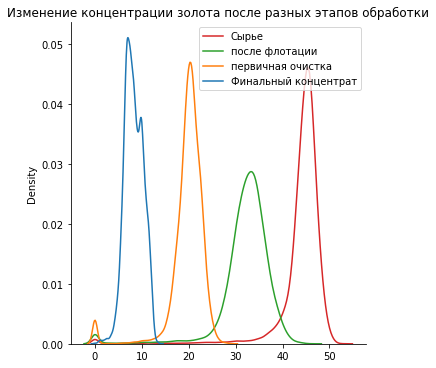

In [30]:
sns.displot(AU, legend=False, kind='kde')
plt.legend(['Сырье', 'после флотации', 'первичная очистка', 'Финальный концентрат'], fontsize=10)
plt.title('Изменение концентрации золота после разных этапов обработки')

Text(0.5, 1.0, 'Изменение концентрации свинца после разных этапов обработки')

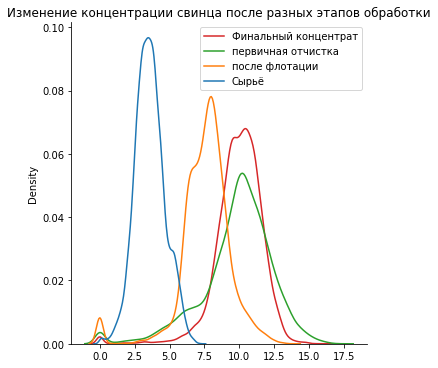

In [31]:
sns.displot(PB, legend=False, kind='kde')
plt.legend(['Финальный концентрат', 'первичная отчистка', 'после флотации', 'Сырьё'], fontsize=10)
plt.title('Изменение концентрации свинца после разных этапов обработки')

Text(0.5, 1.0, 'Изменение концентрации серебра после разных этапов обработки')

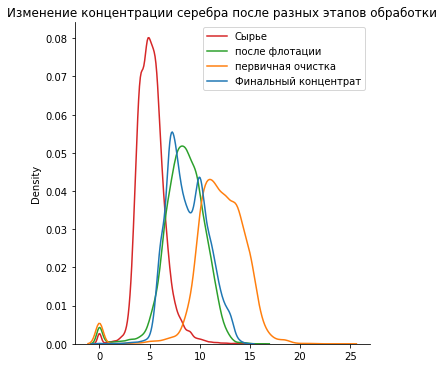

In [32]:
sns.displot(AG, legend=False, kind='kde')
plt.legend(['Сырье', 'после флотации', 'первичная очистка', 'Финальный концентрат'], fontsize=10)
plt.title('Изменение концентрации серебра после разных этапов обработки')

Итак, можно наблюдать что с каждым этапом очистки концентрация золота заметно увеличивается, в то время как концентрация серебра наоборот снижается. Свинец показывает небольшое увелечение концентрации. Приступим к следующему шагу.

# Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

Text(0, 0.5, 'соотношение')

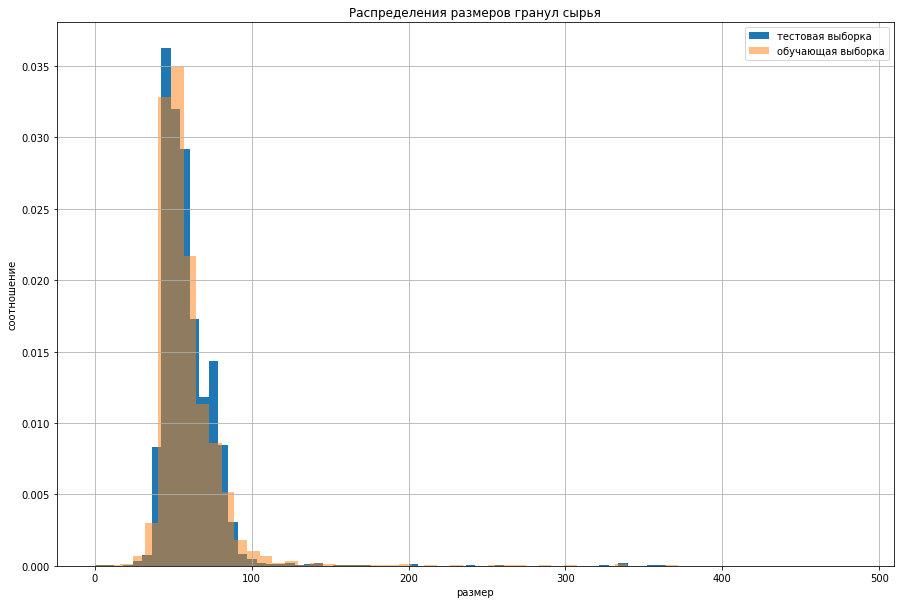

In [33]:
new_test_df['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=1, density=True)
new_train_df['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=0.5, density=True)
plt.legend(['тестовая выборка', 'обучающая выборка'])
plt.title('Распределения размеров гранул сырья')
plt.xlabel('размер')
plt.ylabel('соотношение')

Распределения не сильно отличаются друг от друга, оценка модели будет правильной. Перейдём к следующему шагу

# Cуммарная концентрация всех веществ на разных стадиях

In [34]:
feed_concentrate = full_df['rougher.input.feed_ag'] + full_df['rougher.input.feed_pb'] +\
            full_df['rougher.input.feed_sol'] + full_df['rougher.input.feed_au']
rougher_concentrate = full_df['rougher.output.concentrate_ag'] + full_df['rougher.output.concentrate_pb'] +\
            full_df['rougher.output.concentrate_sol'] + full_df['rougher.output.concentrate_au']
final_concentrate = full_df['final.output.concentrate_ag'] + full_df['final.output.concentrate_pb'] +\
            full_df['final.output.concentrate_sol'] + full_df['final.output.concentrate_au']

Text(0, 0.5, 'соотношение')

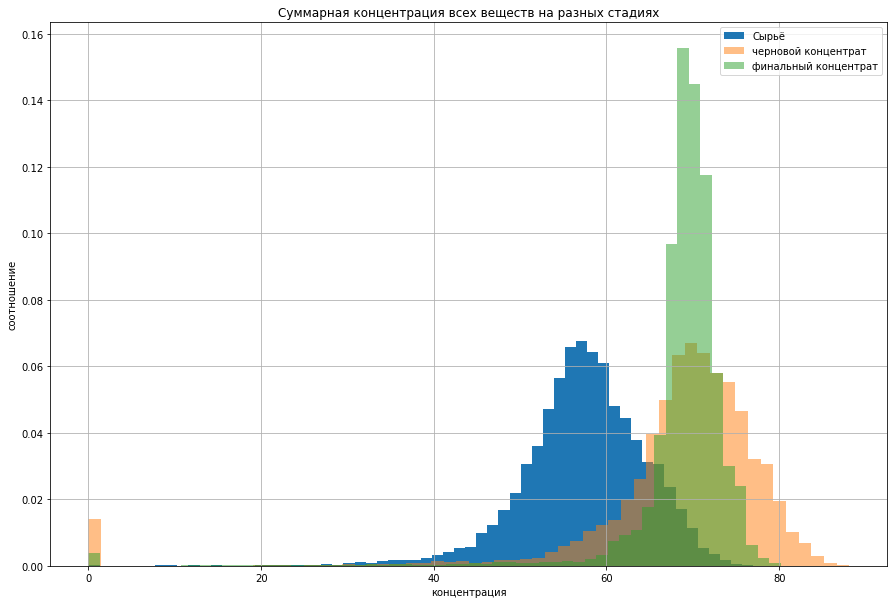

In [35]:
feed_concentrate.hist(figsize=(15, 10), bins=60, alpha=1, density=True)
rougher_concentrate.hist(figsize=(15, 10), bins=60, alpha=0.5, density=True)
final_concentrate.hist(figsize=(15, 10), bins=60, alpha=0.5, density=True)
plt.legend(['Сырьё', 'черновой концентрат', 'финальный концентрат'])
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('концентрация')
plt.ylabel('соотношение')

Видим, что аномальные значения лежат где-то возле нуля. Так что где-то до 25 можно смело удалить для построения более точной модели, но для сырья поставим значение меньше 1, т.к. мы не знаем в каком виде может поступать сырьё на производство.

In [36]:
full_df = full_df.query('@feed_concentrate > 1 & @rougher_concentrate > 25 & @final_concentrate > 25')

Теперь подготовим наши выборки для обучения. Для этого добавим целевые признаки по индексам. Чтобы индексы в обеих выборках совпадали. Так мы отберём из трейна выбросы, которые мы обнаружили в полной выборке. Тоже самое действие проделаем и с тестовой выборкой.

In [37]:
good_df_for_train = pd.merge(new_train_df, full_df[['rougher.output.recovery', 'final.output.recovery']],
        left_index=True, right_index=True)

Теперь сравним их.

In [38]:
print('Колличество строк до объединения в обучающей выборке', new_train_df.shape[0])
print('Колличество строк после объединения в обучающей выборке', good_df_for_train.shape[0])

Колличество строк до объединения в обучающей выборке 14579
Колличество строк после объединения в обучающей выборке 14028


Сделаем тоже самое и с тестовой выборкой.

In [39]:
good_df_for_test = pd.merge(new_test_df, full_df[['rougher.output.recovery', 'final.output.recovery']],
         left_index=True, right_index=True)

In [40]:
print('Колличество строк до объединения в тестовой выборке', new_test_df.shape[0])
print('Колличество строк после объединения в тестовой выборке', good_df_for_test.shape[0])

Колличество строк до объединения в тестовой выборке 4860
Колличество строк после объединения в тестовой выборке 4843


Теперь перед тем как перейти к следующему шагу посмотрим есть ли у нас пропуски и если их немного, то просто удалим их.

In [41]:
good_df_for_train.isnull().sum().sum()

0

Пропуски отсутствуют. Переходим к следующему шагу.

## Модель

# Построение модели

Для начала разделим нашу выборку на признаки и целевые признаки.

In [42]:
x_train = good_df_for_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train_rougher = good_df_for_train['rougher.output.recovery']
y_train_final = good_df_for_train['final.output.recovery']
x_test = good_df_for_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test_rougher = good_df_for_test['rougher.output.recovery']
y_test_final = good_df_for_test['final.output.recovery']

Перед обучением модели напишем функции для наших метрик и приступим к обучению.

# Метрики

- sMAPE
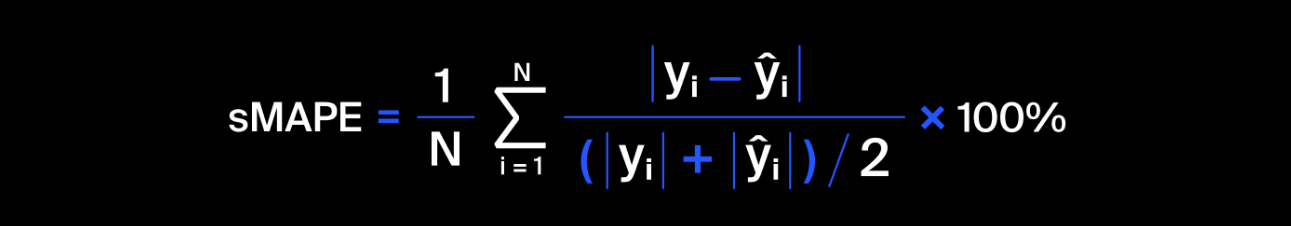

In [43]:
def sMAPE(true, pred):
    return 100/len(true) * np.sum(2 * np.abs(pred - true) / (np.abs(true) + np.abs(pred)))

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Вместо суммирования и деления на длину, кажется, намного проще использовать метод .mean()

- Итоговый sMAPE
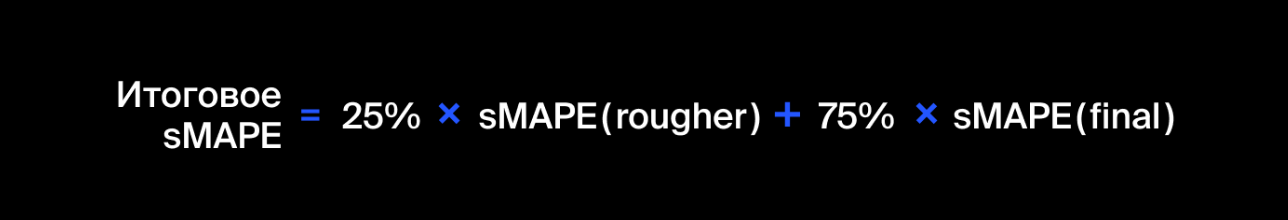

In [44]:
def the_total_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25 * sMAPE_rougher + 0.75 * sMAPE_final)

In [45]:
smape_score = make_scorer(sMAPE, greater_is_better=False)

# Обучение модели и оценка качества

Автоматизируем наш процесс обучения с помощью пайплайна.

In [46]:
lasso_model = make_pipeline(StandardScaler(), Lasso(random_state=42))
forestregressor_model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
treeregressor_model = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42))

Теперь, чтобы передать параметры для кросс-валидации посмотрим как они именуются у каждой модели.

In [47]:
lasso_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [48]:
forestregressor_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

In [49]:
forestregressor_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

Передаём параметры.

In [50]:
forestregressor_params = {'randomforestregressor__n_estimators':range(10, 61, 10),
             'randomforestregressor__max_depth':range (1,10)}
treeregressor_params= {'decisiontreeregressor__max_depth':range (1,10)}
lasso_params = {'lasso__alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}

Напишем кросс-валидацию для Лассо - модели

In [51]:
grid_rougher_lasso = RandomizedSearchCV(lasso_model, param_distributions = lasso_params, cv=10,
                                            scoring = smape_score, n_jobs=-1)
grid_final_lasso = RandomizedSearchCV(lasso_model, param_distributions = lasso_params, cv=10,
                                            scoring = smape_score, n_jobs=-1)

Теперь для леса

In [52]:
grid_rougher_forestregressor = RandomizedSearchCV(forestregressor_model, cv=5, param_distributions = forestregressor_params,
                                            scoring = smape_score, n_jobs=-1)
grid_final_forestregressor = RandomizedSearchCV(forestregressor_model, cv=5, param_distributions = forestregressor_params,
                                          scoring=smape_score, n_jobs=-1)

И для деревьев

In [53]:
grid_rougher_treeregressor = RandomizedSearchCV(treeregressor_model, cv=5, param_distributions = treeregressor_params, 
                                          scoring=smape_score, n_jobs=-1)
grid_final_treeregressor = RandomizedSearchCV(treeregressor_model, cv=5, param_distributions = treeregressor_params, 
                                        scoring=smape_score, n_jobs=-1)

Обучим наши модели и глянем на лучшие параметры.

In [54]:
grid_rougher_lasso.fit(x_train,y_train_rougher)
grid_final_lasso.fit(x_train,y_train_final)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('lasso',
                                              Lasso(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'lasso__alpha': [0.02, 0.024, 0.025,
                                                         0.026, 0.03]},
                   scoring=make_scorer(sMAPE, greater_is_better=False))

In [55]:
grid_rougher_lasso.best_score_

-5.733443009848297

In [56]:
grid_final_lasso.best_score_

-9.454573383288496

In [57]:
grid_rougher_forestregressor.fit(x_train,y_train_rougher)
grid_final_forestregressor.fit(x_train,y_train_final)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestregressor__max_depth': range(1, 10),
                                        'randomforestregressor__n_estimators': range(10, 61, 10)},
                   scoring=make_scorer(sMAPE, greater_is_better=False))

In [58]:
grid_rougher_forestregressor.best_score_

-6.423345104583018

In [59]:
grid_final_forestregressor.best_score_

-8.861903852671515

In [60]:
grid_rougher_treeregressor.fit(x_train,y_train_rougher)
grid_final_treeregressor.fit(x_train,y_train_final)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('decisiontreeregressor',
                                              DecisionTreeRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'decisiontreeregressor__max_depth': range(1, 10)},
                   scoring=make_scorer(sMAPE, greater_is_better=False))

In [61]:
grid_rougher_treeregressor.best_score_

-6.445161393728725

In [62]:
grid_final_treeregressor.best_score_

-8.947087223440082

Пока самые лучшие параметры у Лассо модели. Посмотрим на финальную оценку и выберем самую минимальную

In [63]:
the_total_sMAPE(grid_rougher_lasso.best_score_, grid_final_lasso.best_score_)

-8.524290789928445

In [64]:
the_total_sMAPE(grid_rougher_forestregressor.best_score_, grid_final_forestregressor.best_score_)

-8.252264165649391

In [65]:

the_total_sMAPE(grid_rougher_treeregressor.best_score_, grid_final_treeregressor.best_score_)

-8.321605766012244

Выбираем леса и смотрим результаты на тестовой выборке.

In [80]:
rougher_pred = grid_rougher_lasso.predict(x_test)
final_pred = grid_final_forestregressor.predict(x_test)

In [81]:
the_total_sMAPE(sMAPE(y_test_rougher,rougher_pred),sMAPE(y_test_final,final_pred))

7.426786216764773

Ну собственно вот. Оценка получена. Теперь напишем константную модель и посмотрим верно ли предсказывает наша модель. Пусть наша константная модель предсказывает средние значения.

In [82]:
constant_rougher = make_pipeline(StandardScaler(), DummyRegressor(strategy='mean'))
constant_final = make_pipeline(StandardScaler(), DummyRegressor(strategy='mean'))

Теперь обучим ещё на наших выборках

In [83]:
constant_rougher.fit(x_train,y_train_rougher)
constant_final.fit(x_train,y_train_final)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyregressor', DummyRegressor())])

In [84]:
constant_rougher_pred = constant_rougher.predict(x_test)
constant_final_pred = constant_final.predict(x_test)

In [85]:
the_total_sMAPE(sMAPE(y_test_rougher,constant_rougher_pred),sMAPE(y_test_final,constant_final_pred))

8.392401537816145

Видим, что наша метрика получилась ниже, чем на константной модели. Значит мы сделали всё верно.

# Общий вывод

Мы проделали хорошую работу для определения модели по предсказанию коэффицента восстановления золота из золотосодержащей руды.
1. Мы изучили наши данные и убедились в корректности рассчетов эффективности обогащения
2. Мы провели предобработку данных, попытавшись сохранить максимальное количество данных, воспользовавшись их взаимосвязью (соседние наблюдения мало отличаются друг от друга)
3. Мы проанализировали данные и увидели как меняется концентрация металлов на разных этапах (увидели рост золота и свинца и падения серебра)
4. Убедились, что распределения размеров гранул не сильно отличаются друг от друга
5. Исследовали концентрацию веществ на разных стадиях и избавились от аномалий в каждой из трех выборок
6. По итогу мы выбрали модели, обеспечивающие наименьшие значения sMAPE и итоговой оценки. В нашем случае лучшим решением оказалась Лассо модель, хотя она и не смогла сильно превзойти константную модель.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ x]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке выполнения
- [x ]  Выполнен шаг 1: данные подготовлены
    - [x ]  Проверена формула вычисления эффективности обогащения
    - [x ]  Проанализированы признаки, недоступные в тестовой выборке
    - [x ]  Проведена предобработка данных
- [x ]  Выполнен шаг 2: данные проанализированы
    - [x ]  Исследовано изменение концентрации элементов на каждом этапе
    - [x ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x ]  Исследованы суммарные концентрации
- [x ]  Выполнен шаг 3: построена модель прогнозирования
    - [x ]  Написана функция для вычисления итогового *sMAPE*
    - [x ]  Обучено и проверено несколько моделей
    - [x ]  Выбрана лучшая модель, её качество проверено на тестовой выборке